# Twitter Sentiment Analysis

In [216]:
import pandas as pd # To hande data
import numpy as np # To compute numbers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
import tweepy # To consume Twitter's api
from textblob import TextBlob

# plotting and  visualizaion
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Getting data using a scrapper provided

by http://www.trumptwitterarchive.com  or https://github.com/bpb27/twitter_scraping

In [217]:
# Through Selenium Python API you can access all functionalities of Selenium WebDriver in an intuitive way.
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException
from time import sleep
import json
import datetime


In [218]:
user = 'realdonaldtrump'
start = datetime.datetime(2016, 11, 1)
end = datetime.datetime(2019, 2, 17)

In [6]:
#Run Chrome Driver
delay = 1  # time to wait on each page load before reading the page
driver = webdriver.Chrome(r'C:\Users\sarin_000\Desktop\ds_projects\ga_repo\chromedriver.exe')

In [27]:
# Get data from twitter
twitter_ids_filename = 'all_ids.json'
days = (end - start).days + 1
id_selector = '.time a.tweet-timestamp'
tweet_selector = 'li.js-stream-item'
user = user.lower()
ids = []

def format_day(date):
    day = '0' + str(date.day) if len(str(date.day)) == 1 else str(date.day)
    month = '0' + str(date.month) if len(str(date.month)) == 1 else str(date.month)
    year = str(date.year)
    return '-'.join([year, month, day])

def form_url(since, until):
    p1 = 'https://twitter.com/search?f=tweets&vertical=default&q=from%3A'
    p2 =  user + '%20since%3A' + since + '%20until%3A' + until + 'include%3Aretweets&src=typd'
    return p1 + p2

def increment_day(date, i):
    return date + datetime.timedelta(days=i)

for day in range(days):
    d1 = format_day(increment_day(start, 0))
    d2 = format_day(increment_day(start, 1))
    url = form_url(d1, d2)
    print(url)
    print(d1)
    driver.get(url)
    sleep(delay)

    try:
        found_tweets = driver.find_elements_by_css_selector(tweet_selector)
        increment = 10

        while len(found_tweets) >= increment:
            print('scrolling down to load more tweets')
            driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
            sleep(delay)
            found_tweets = driver.find_elements_by_css_selector(tweet_selector)
            increment += 10

        print('{} tweets found, {} total'.format(len(found_tweets), len(ids)))

        for tweet in found_tweets:
            try:
                id = tweet.find_element_by_css_selector(id_selector).get_attribute('href').split('/')[-1]
                ids.append(id)
            except StaleElementReferenceException as e:
                print('lost element reference', tweet)

    except NoSuchElementException:
        print('no tweets on this day')

    start = increment_day(start, 1)


try:
    with open(twitter_ids_filename) as f:
        all_ids = ids + json.load(f)
        data_to_write = list(set(all_ids))
        print('tweets found on this scrape: ', len(ids))
        print('total tweet count: ', len(data_to_write))
except FileNotFoundError:
    with open(twitter_ids_filename, 'w') as f:
        all_ids = ids
        data_to_write = list(set(all_ids))
        print('tweets found on this scrape: ', len(ids))
        print('total tweet count: ', len(data_to_write))

with open(twitter_ids_filename, 'w') as outfile:
    json.dump(data_to_write, outfile)

print('all done here')
driver.close()


https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-11-01%20until%3A2016-11-02include%3Aretweets&src=typd
2016-11-01
scrolling down to load more tweets
13 tweets found, 0 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-11-02%20until%3A2016-11-03include%3Aretweets&src=typd
2016-11-02
scrolling down to load more tweets
14 tweets found, 13 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-11-03%20until%3A2016-11-04include%3Aretweets&src=typd
2016-11-03
8 tweets found, 27 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-11-04%20until%3A2016-11-05include%3Aretweets&src=typd
2016-11-04
scrolling down to load more tweets
12 tweets found, 35 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-11-05%20until%3A2016-11-06include%3Aretweets&src=typd
2016-11-05
9 t

8 tweets found, 239 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-12-14%20until%3A2016-12-15include%3Aretweets&src=typd
2016-12-14
2 tweets found, 247 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-12-15%20until%3A2016-12-16include%3Aretweets&src=typd
2016-12-15
5 tweets found, 249 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-12-16%20until%3A2016-12-17include%3Aretweets&src=typd
2016-12-16
4 tweets found, 254 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-12-17%20until%3A2016-12-18include%3Aretweets&src=typd
2016-12-17
5 tweets found, 258 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2016-12-18%20until%3A2016-12-19include%3Aretweets&src=typd
2016-12-18
3 tweets found, 263 total
https://twitter.com/search?f=tweets&vertical=default&q

scrolling down to load more tweets
10 tweets found, 474 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-01-27%20until%3A2017-01-28include%3Aretweets&src=typd
2017-01-27
7 tweets found, 484 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-01-28%20until%3A2017-01-29include%3Aretweets&src=typd
2017-01-28
4 tweets found, 491 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-01-29%20until%3A2017-01-30include%3Aretweets&src=typd
2017-01-29
7 tweets found, 495 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-01-30%20until%3A2017-01-31include%3Aretweets&src=typd
2017-01-30
7 tweets found, 502 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-01-31%20until%3A2017-02-01include%3Aretweets&src=typd
2017-01-31
3 tweets found, 509 total
https://twitter.co

1 tweets found, 704 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-03-12%20until%3A2017-03-13include%3Aretweets&src=typd
2017-03-12
0 tweets found, 705 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-03-13%20until%3A2017-03-14include%3Aretweets&src=typd
2017-03-13
5 tweets found, 705 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-03-14%20until%3A2017-03-15include%3Aretweets&src=typd
2017-03-14
2 tweets found, 710 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-03-15%20until%3A2017-03-16include%3Aretweets&src=typd
2017-03-15
7 tweets found, 712 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-03-16%20until%3A2017-03-17include%3Aretweets&src=typd
2017-03-16
6 tweets found, 719 total
https://twitter.com/search?f=tweets&vertical=default&q

5 tweets found, 889 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-04-26%20until%3A2017-04-27include%3Aretweets&src=typd
2017-04-26
9 tweets found, 894 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-04-27%20until%3A2017-04-28include%3Aretweets&src=typd
2017-04-27
scrolling down to load more tweets
12 tweets found, 903 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-04-28%20until%3A2017-04-29include%3Aretweets&src=typd
2017-04-28
3 tweets found, 915 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-04-29%20until%3A2017-04-30include%3Aretweets&src=typd
2017-04-29
3 tweets found, 918 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-04-30%20until%3A2017-05-01include%3Aretweets&src=typd
2017-04-30
5 tweets found, 921 total
https://twitter.co

6 tweets found, 1095 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-06-10%20until%3A2017-06-11include%3Aretweets&src=typd
2017-06-10
2 tweets found, 1101 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-06-11%20until%3A2017-06-12include%3Aretweets&src=typd
2017-06-11
4 tweets found, 1103 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-06-12%20until%3A2017-06-13include%3Aretweets&src=typd
2017-06-12
6 tweets found, 1107 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-06-13%20until%3A2017-06-14include%3Aretweets&src=typd
2017-06-13
9 tweets found, 1113 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-06-14%20until%3A2017-06-15include%3Aretweets&src=typd
2017-06-14
3 tweets found, 1122 total
https://twitter.com/search?f=tweets&vertical=def

14 tweets found, 1367 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-07-23%20until%3A2017-07-24include%3Aretweets&src=typd
2017-07-23
4 tweets found, 1381 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-07-24%20until%3A2017-07-25include%3Aretweets&src=typd
2017-07-24
9 tweets found, 1385 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-07-25%20until%3A2017-07-26include%3Aretweets&src=typd
2017-07-25
scrolling down to load more tweets
19 tweets found, 1394 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-07-26%20until%3A2017-07-27include%3Aretweets&src=typd
2017-07-26
scrolling down to load more tweets
11 tweets found, 1413 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-07-27%20until%3A2017-07-28include%3Aretweets&src=typd
2017-07-27
9 

scrolling down to load more tweets
10 tweets found, 1661 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-09-04%20until%3A2017-09-05include%3Aretweets&src=typd
2017-09-04
1 tweets found, 1671 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-09-05%20until%3A2017-09-06include%3Aretweets&src=typd
2017-09-05
4 tweets found, 1672 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-09-06%20until%3A2017-09-07include%3Aretweets&src=typd
2017-09-06
7 tweets found, 1676 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-09-07%20until%3A2017-09-08include%3Aretweets&src=typd
2017-09-07
9 tweets found, 1683 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-09-08%20until%3A2017-09-09include%3Aretweets&src=typd
2017-09-08
8 tweets found, 1692 total
https://twit

2 tweets found, 1994 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-10-16%20until%3A2017-10-17include%3Aretweets&src=typd
2017-10-16
7 tweets found, 1996 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-10-17%20until%3A2017-10-18include%3Aretweets&src=typd
2017-10-17
8 tweets found, 2003 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-10-18%20until%3A2017-10-19include%3Aretweets&src=typd
2017-10-18
scrolling down to load more tweets
17 tweets found, 2011 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-10-19%20until%3A2017-10-20include%3Aretweets&src=typd
2017-10-19
6 tweets found, 2028 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-10-20%20until%3A2017-10-21include%3Aretweets&src=typd
2017-10-20
scrolling down to load more tweets
11 t

3 tweets found, 2329 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-11-27%20until%3A2017-11-28include%3Aretweets&src=typd
2017-11-27
4 tweets found, 2332 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-11-28%20until%3A2017-11-29include%3Aretweets&src=typd
2017-11-28
9 tweets found, 2336 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-11-29%20until%3A2017-11-30include%3Aretweets&src=typd
2017-11-29
scrolling down to load more tweets
15 tweets found, 2345 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-11-30%20until%3A2017-12-01include%3Aretweets&src=typd
2017-11-30
scrolling down to load more tweets
14 tweets found, 2360 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2017-12-01%20until%3A2017-12-02include%3Aretweets&src=typd
2017-12-01
8 t

7 tweets found, 2592 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-01-09%20until%3A2018-01-10include%3Aretweets&src=typd
2018-01-09
4 tweets found, 2599 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-01-10%20until%3A2018-01-11include%3Aretweets&src=typd
2018-01-10
scrolling down to load more tweets
10 tweets found, 2603 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-01-11%20until%3A2018-01-12include%3Aretweets&src=typd
2018-01-11
8 tweets found, 2613 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-01-12%20until%3A2018-01-13include%3Aretweets&src=typd
2018-01-12
scrolling down to load more tweets
14 tweets found, 2621 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-01-13%20until%3A2018-01-14include%3Aretweets&src=typd
2018-01-13
5 t

7 tweets found, 2833 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-02-22%20until%3A2018-02-23include%3Aretweets&src=typd
2018-02-22
scrolling down to load more tweets
10 tweets found, 2840 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-02-23%20until%3A2018-02-24include%3Aretweets&src=typd
2018-02-23
scrolling down to load more tweets
10 tweets found, 2850 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-02-24%20until%3A2018-02-25include%3Aretweets&src=typd
2018-02-24
9 tweets found, 2860 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-02-25%20until%3A2018-02-26include%3Aretweets&src=typd
2018-02-25
2 tweets found, 2869 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-02-26%20until%3A2018-02-27include%3Aretweets&src=typd
2018-02-26
0 t

https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-04-06%20until%3A2018-04-07include%3Aretweets&src=typd
2018-04-06
6 tweets found, 3084 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-04-07%20until%3A2018-04-08include%3Aretweets&src=typd
2018-04-07
6 tweets found, 3090 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-04-08%20until%3A2018-04-09include%3Aretweets&src=typd
2018-04-08
7 tweets found, 3096 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-04-09%20until%3A2018-04-10include%3Aretweets&src=typd
2018-04-09
4 tweets found, 3103 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-04-10%20until%3A2018-04-11include%3Aretweets&src=typd
2018-04-10
5 tweets found, 3107 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtru

scrolling down to load more tweets
10 tweets found, 3374 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-05-19%20until%3A2018-05-20include%3Aretweets&src=typd
2018-05-19
3 tweets found, 3384 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-05-20%20until%3A2018-05-21include%3Aretweets&src=typd
2018-05-20
8 tweets found, 3387 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-05-21%20until%3A2018-05-22include%3Aretweets&src=typd
2018-05-21
scrolling down to load more tweets
10 tweets found, 3395 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-05-22%20until%3A2018-05-23include%3Aretweets&src=typd
2018-05-22
2 tweets found, 3405 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-05-23%20until%3A2018-05-24include%3Aretweets&src=typd
2018-05-23
scr

scrolling down to load more tweets
16 tweets found, 3776 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-06-28%20until%3A2018-06-29include%3Aretweets&src=typd
2018-06-28
scrolling down to load more tweets
14 tweets found, 3792 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-06-29%20until%3A2018-06-30include%3Aretweets&src=typd
2018-06-29
3 tweets found, 3806 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-06-30%20until%3A2018-07-01include%3Aretweets&src=typd
2018-06-30
7 tweets found, 3809 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-07-01%20until%3A2018-07-02include%3Aretweets&src=typd
2018-07-01
3 tweets found, 3816 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-07-02%20until%3A2018-07-03include%3Aretweets&src=typd
2018-07-02
2 t

3 tweets found, 4144 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-08-08%20until%3A2018-08-09include%3Aretweets&src=typd
2018-08-08
scrolling down to load more tweets
10 tweets found, 4147 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-08-09%20until%3A2018-08-10include%3Aretweets&src=typd
2018-08-09
6 tweets found, 4157 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-08-10%20until%3A2018-08-11include%3Aretweets&src=typd
2018-08-10
8 tweets found, 4163 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-08-11%20until%3A2018-08-12include%3Aretweets&src=typd
2018-08-11
7 tweets found, 4171 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-08-12%20until%3A2018-08-13include%3Aretweets&src=typd
2018-08-12
5 tweets found, 4178 total
https://twit

6 tweets found, 4577 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-09-17%20until%3A2018-09-18include%3Aretweets&src=typd
2018-09-17
scrolling down to load more tweets
12 tweets found, 4583 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-09-18%20until%3A2018-09-19include%3Aretweets&src=typd
2018-09-18
scrolling down to load more tweets
12 tweets found, 4595 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-09-19%20until%3A2018-09-20include%3Aretweets&src=typd
2018-09-19
9 tweets found, 4607 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-09-20%20until%3A2018-09-21include%3Aretweets&src=typd
2018-09-20
scrolling down to load more tweets
14 tweets found, 4616 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-09-21%20until%3A2018-09-22includ

scrolling down to load more tweets
13 tweets found, 4959 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-10-28%20until%3A2018-10-29include%3Aretweets&src=typd
2018-10-28
4 tweets found, 4972 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-10-29%20until%3A2018-10-30include%3Aretweets&src=typd
2018-10-29
7 tweets found, 4976 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-10-30%20until%3A2018-10-31include%3Aretweets&src=typd
2018-10-30
scrolling down to load more tweets
18 tweets found, 4983 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-10-31%20until%3A2018-11-01include%3Aretweets&src=typd
2018-10-31
scrolling down to load more tweets
14 tweets found, 5001 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-11-01%20until%3A2018-11-02includ

scrolling down to load more tweets
scrolling down to load more tweets
22 tweets found, 5316 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-12-08%20until%3A2018-12-09include%3Aretweets&src=typd
2018-12-08
scrolling down to load more tweets
12 tweets found, 5338 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-12-09%20until%3A2018-12-10include%3Aretweets&src=typd
2018-12-09
3 tweets found, 5350 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-12-10%20until%3A2018-12-11include%3Aretweets&src=typd
2018-12-10
3 tweets found, 5353 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2018-12-11%20until%3A2018-12-12include%3Aretweets&src=typd
2018-12-11
scrolling down to load more tweets
13 tweets found, 5356 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A20

2 tweets found, 5688 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2019-01-18%20until%3A2019-01-19include%3Aretweets&src=typd
2019-01-18
scrolling down to load more tweets
13 tweets found, 5690 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2019-01-19%20until%3A2019-01-20include%3Aretweets&src=typd
2019-01-19
scrolling down to load more tweets
11 tweets found, 5703 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2019-01-20%20until%3A2019-01-21include%3Aretweets&src=typd
2019-01-20
scrolling down to load more tweets
11 tweets found, 5714 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2019-01-21%20until%3A2019-01-22include%3Aretweets&src=typd
2019-01-21
scrolling down to load more tweets
15 tweets found, 5725 total
https://twitter.com/search?f=tweets&vertical=default&q=from%3Arealdonaldtrump%20since%3A2

In [225]:
# Mass Data 
import tweepy
import json
import math
import glob
import csv
import zipfile
import zlib
from tweepy import TweepError
from time import sleep
import unicodedata
user = 'realdonaldtrump'
# Consumer keys and access tokens, used for OAuth
consumer_key = 'MKFuTmc28rZ8UARafp6Xc9R6f'
consumer_secret = 'uuw9QolA6jEfDNVCi0YNLBYOGyk44FIqQOjPPHLH60JAUMhl8o'
#Access
access_token = '797075677946277888-CBRjWMulthQ1RD94GJ5ZojA4sFPzixj'
access_token_secret = 'fpjUviOHzgGxzWiOYLrrSQ6SJb52qhRd6QESbCs7VzirK'

# OAuth
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth) 

user = user.lower()
output_file = '{}.json'.format(user)
output_file_short = '{}_short.json'.format(user)
compression = zipfile.ZIP_DEFLATED

with open('all_ids.json') as f:
    ids = json.load(f)

print('total ids: {}'.format(len(ids)))

all_data = []
start = 0
end = 100
limit = len(ids)
i = math.ceil(limit / 100)

for go in range(i):
    print('currently getting {} - {}'.format(start, end))
    sleep(6)  # needed to prevent hitting API rate limit
    id_batch = ids[start:end]
    start += 100
    end += 100
    tweets = api.statuses_lookup(id_batch)
    for tweet in tweets:
        all_data.append(dict(tweet._json))

print('metadata collection complete')
print('creating master json file')
with open(output_file, 'w') as outfile:
    json.dump(all_data, outfile)

print('creating ziped master json file')
zf = zipfile.ZipFile('{}.zip'.format(user), mode='w')
zf.write(output_file, compress_type=compression)
zf.close()

results = []

def is_retweet(entry):
    return 'retweeted_status' in entry.keys()

def get_source(entry):
    if '<' in entry["source"]:
        return entry["source"].split('>')[1].split('<')[0]
    else:
        return entry["source"]

with open(output_file) as json_data:
    data = json.load(json_data)
    for entry in data:
        t = {
            "created_at": entry["created_at"],
            "text": entry["text"],
            "in_reply_to_screen_name": entry["in_reply_to_screen_name"],
            "retweet_count": entry["retweet_count"],
            "favorite_count": entry["favorite_count"],
            "source": get_source(entry),
            "id_str": entry["id_str"],
            "is_retweet": is_retweet(entry)
        }
        results.append(t)

print('creating minimized json master file')
with open(output_file_short, 'w') as outfile:
    json.dump(results, outfile)


total ids: 5930
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
currently getting 2700 - 2800
currently getting 2800 - 2900
currently getting 2900 - 3000
currently getting 3000 - 3100
currently getting 3100 - 3200
currently getting 3200 - 3300
currently getti

In [219]:
# Open File
with open(r'C:\Users\sarin_000\Desktop\ds_projects\ga_repo\realdonaldtrump_short.json') as f:
    jsondata = json.load(f)

normalized_json = pd.io.json.json_normalize(jsondata)

tweets = pd.DataFrame(normalized_json)
#Covert Pandas to Datetime
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets.text.fillna(tweets.text, inplace=True)

In [220]:
#Sorty by time
tweets.sort_values(['created_at'], ascending=True,inplace=True)
tweets.head(2)

,created_at,favorite_count,id_str,in_reply_to_screen_name,is_retweet,retweet_count,source,text
2913,2016-11-01 10:31:46,48997,793400131525677056,None,False,19118,Twitter for Android,Look at the way Crooked Hillary is handling th...
3321,2016-11-01 11:55:47,34432,793421274043285504,None,False,14704,Twitter for Android,"Wow, now leading in @ABC /@washingtonpost Poll..."


In [225]:
# Drop unnecessary columns
tweets.drop(['id_str','in_reply_to_screen_name','is_retweet'], axis=1, inplace=True)
tweets.head(3)

,created_at,favorite_count,retweet_count,source,text
2913,2016-11-01 10:31:46,48997,19118,Twitter for Android,Look at the way Crooked Hillary is handling th...
3321,2016-11-01 11:55:47,34432,14704,Twitter for Android,"Wow, now leading in @ABC /@washingtonpost Poll..."
1304,2016-11-01 12:01:11,52775,21172,Twitter for Android,Crooked Hillary should not be allowed to run f...


# 2. Descriptive Analysis

Total Tweets from Nov.1. 2016 to Feb. 17 2019

In [226]:
tweets.shape

(5930, 5)

In [227]:
tweets.columns

Index(['created_at', 'favorite_count', 'retweet_count', 'source', 'text'], dtype='object')

In [228]:
tweets.isnull().sum()

created_at        0
favorite_count    0
retweet_count     0
source            0
text              0
dtype: int64

In [229]:
# Total tweets for the priod 
print ('Total tweets start from Nov. 1, 2016 to Feb. 17,2019 : ',len(tweets.index),'\n')

Total tweets start from Nov. 1, 2016 to Feb. 17,2019 :  5930 



In [230]:
# Retweets
tweet_retweets = tweets.sort_values(by='retweet_count', ascending=False)
tweet_retweets= tweet_retweets.reset_index(drop=True)
print ('Average retweets:', round(tweet_retweets['retweet_count'].mean(),2), '\n')
print ('Top 5 Retweets:')
for i in range(5): #iloc to prinit row until i
    print (tweet_retweets['text'].iloc[i], '-', tweet_retweets['retweet_count'].iloc[i])

Average retweets: 19728.48 

Top 5 Retweets:
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg - 330186
TODAY WE MAKE AMERICA GREAT AGAIN! - 312109
Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so… https://t.co/PmsWNkH4r4 - 246419
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before - 197935
North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0 - 174606


In [231]:
# Likes
tweet_likes = tweets.sort_values(by='favorite_count', ascending=False)
tweet_likes = tweet_likes.reset_index(drop=True)
print ('Average likes:', round(tweet_likes['favorite_count'].mean(),2), '\n')
print ('Top 5 Liked:')
for i in range(5):
    print (tweet_likes['text'].iloc[i], '-', tweet_likes['favorite_count'].iloc[i])


Average likes: 84952.47 

Top 5 Liked:
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before - 584620
Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so… https://t.co/PmsWNkH4r4 - 583598
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg - 552026
TODAY WE MAKE AMERICA GREAT AGAIN! - 535142
Merry Christmas! - 501996


In [281]:
# Find mostly used words
from collections import Counter
#import nltk
import string
import unicodedata
#import stopwords from Sklearn (or nltk)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line
tweets['text encoded'] = tweets['text'].apply(encodeText)
top_N = 50

custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.append('&amp')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(custom_stop_words))

words = (tweets.text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)
words


['look',
 'way',
 'crooked',
 'hillary',
 'handling',
 'e-mail',
 'case',
 'total',
 'mess',
 '.',
 'unfit',
 'president.',
 'bad',
 'judgement!',
 'wow,',
 'leading',
 '@abc',
 '/@washingtonpost',
 'poll',
 '46',
 '45.',
 'gone',
 '12',
 'points',
 'weeks,',
 'crooked',
 'hillary',
 'blow-!',
 'crooked',
 'hillary',
 'allowed',
 'run',
 'president.',
 'deleted',
 '33,000',
 'e-mails',
 'getting',
 'subpoena',
 'u.s.',
 'congress.',
 'rigged!',
 'join',
 'tomorrow',
 'florida!',
 'miami•12pm',
 'https://t./a3x71q6sg2',
 'orlando•4pm',
 'https://t./6bqtvoty5c',
 'pensacola•7p…',
 'https://t./knzraeulzo',
 'terrible',
 'crooked',
 "didn't",
 'report',
 'got',
 'debate',
 'questions',
 'donna',
 'brazile,',
 'page',
 'news!',
 '#icymi:',
 'governor',
 '@mike_pence',
 'valley',
 'forge,',
 'pennsylvania',
 'today.',
 'watch',
 ':…',
 'https://t./6gwgmcv23z',
 '.@darrellissa',
 'good',
 'man.',
 'help',
 'win',
 'congressional',
 'seat',
 'california.',
 "'kept",
 "jail':",
 'doj',
 'offici

In [282]:
# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(50),
                    columns=['Word', 'Frequency']).set_index('Word')

#pd.set_option('display.max_rows', top_N)
words_data = words_data.reset_index()
words_data['Word Encoded'] = words_data['Word'].apply(encodeText)
words_data.drop('Word', axis=1).to_csv('C:\\Users\\sarin_000\\Desktop\\ds_projects\\ga_repo\word-frequencies.csv')
words_data.head(top_N)

,Word,Frequency,Word Encoded
0,great,1017,b'great'
1,…,699,b'...'
2,",",529,"b','"
3,&amp;,527,b'&amp;'
4,!,432,b'!'
5,just,416,b'just'
6,-,407,b'-'
7,thank,380,b'thank'
8,.,374,b'.'
9,people,337,b'people'


# 3. Sentiment Analysis

3.1. Preview the sentiment column.

In [258]:

from textblob import TextBlob
import re
# Removing links and special characters using regex.
#def clean_tweet(tweet):
#    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
# Using textblob, classify the polarity of a twee
def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [259]:
# Create a column to show the results of analysis
tweets['Sentiment'] = np.array([ analize_sentiment(tweet) for tweet in tweets['text'] ])
tweets.head(5)

,created_at,favorite_count,retweet_count,source,text,text encoded,Sentiment
2913,2016-11-01 10:31:46,48997,19118,Twitter for Android,Look at the way Crooked Hillary is handling th...,b'Look at the way Crooked Hillary is handling ...,negative
3321,2016-11-01 11:55:47,34432,14704,Twitter for Android,"Wow, now leading in @ABC /@washingtonpost Poll...","b'Wow, now leading in @ABC /@washingtonpost Po...",positive
1304,2016-11-01 12:01:11,52775,21172,Twitter for Android,Crooked Hillary should not be allowed to run f...,b'Crooked Hillary should not be allowed to run...,neutral
4671,2016-11-01 13:35:47,14671,7853,Twitter for iPhone,JOIN ME TOMORROW IN FLORIDA!\n\nMIAMI•12pm\nht...,b'JOIN ME TOMORROW IN FLORIDA!\n\nMIAMI12pm\nh...,neutral
1627,2016-11-01 14:14:09,72273,29281,Twitter for iPhone,So terrible that Crooked didn't report she got...,"b""So terrible that Crooked didn't report she g...",negative


3.2 Analyzing the results
What percentage of reviews are positive, neutral, and negative?

In [261]:
tweets['Sentiment'].value_counts() / len(tweets)

positive    0.541484
neutral     0.249410
negative    0.209106
Name: Sentiment, dtype: float64

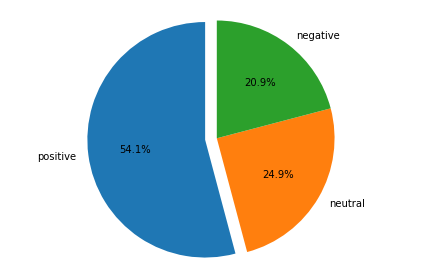

In [262]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

labels = ['positive', 'neutral', 'negative']
sizes = [54.148, 24.94, 20.91]

# Create a pie chart
plt.pie( sizes, labels=labels,shadow=False, explode=(0.1,0,0),startangle=90,autopct='%1.1f%%')

# axis('equal') changes limits of x or y axis so that equal increments of x and y have the same length; a circle is circular
plt.axis('equal')

# Plot
plt.tight_layout()
plt.show()

3.3 Load in the Sentiment IntensityAnalyzer from Vader and add compound, negative, neutral, and positive scores into the DataFrame.

In [263]:
import nltk
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarin_000\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [264]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
#VADER to calculate sentimen see if you can correctly predict the hand-tagged sentiment.
compound= []
neg = []
neu = []
pos = []
for tweet in tweets['text']:
    sent = sia.polarity_scores(tweet)
    compound.append(sent['compound'])
    neg.append(sent['neg'])
    neu.append(sent['neu'])
    pos.append(sent['pos'])

In [265]:
tweets['compound'] = compound
tweets['neg'] = neg
tweets['neu'] = neu
tweets['pos'] = pos

In [266]:
tweets.head()

,created_at,favorite_count,retweet_count,source,text,text encoded,Sentiment,compound,neg,neu,pos
2913,2016-11-01 10:31:46,48997,19118,Twitter for Android,Look at the way Crooked Hillary is handling th...,b'Look at the way Crooked Hillary is handling ...,negative,-0.7424,0.208,0.792,0.000
3321,2016-11-01 11:55:47,34432,14704,Twitter for Android,"Wow, now leading in @ABC /@washingtonpost Poll...","b'Wow, now leading in @ABC /@washingtonpost Po...",positive,0.6239,0.000,0.843,0.157
1304,2016-11-01 12:01:11,52775,21172,Twitter for Android,Crooked Hillary should not be allowed to run f...,b'Crooked Hillary should not be allowed to run...,neutral,-0.5461,0.150,0.850,0.000
4671,2016-11-01 13:35:47,14671,7853,Twitter for iPhone,JOIN ME TOMORROW IN FLORIDA!\n\nMIAMI•12pm\nht...,b'JOIN ME TOMORROW IN FLORIDA!\n\nMIAMI12pm\nh...,neutral,0.4981,0.000,0.756,0.244
1627,2016-11-01 14:14:09,72273,29281,Twitter for iPhone,So terrible that Crooked didn't report she got...,"b""So terrible that Crooked didn't report she g...",negative,-0.5697,0.133,0.867,0.000


3.4 Store tweet sentiment in y to use as labels and create an appropriate feature matrix, X

In [267]:
y = tweets['Sentiment']
X = tweets[['compound', 'neg', 'neu', 'pos']]

3.5 Fit a model of your choice to predict airline_sentient and cross-validate.

In [268]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score, train_test_split

In [269]:
rf.fit(X,y)

C:\Users\sarin_000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [270]:
cross_val_score(rf, X, y)

C:\Users\sarin_000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.64560162, 0.60728745, 0.62955466])

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=14)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

3.6 Display the confusion matrix.
What reviews are difficult to identify?

Text(0.5, 1.0, 'Confusion Matrix')

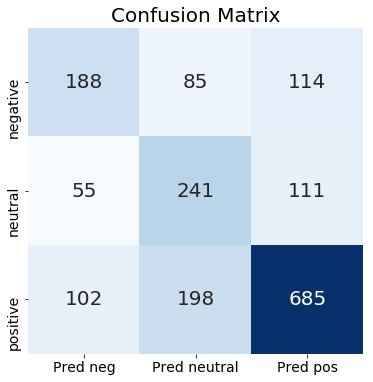

In [272]:
conmat = np.array(confusion_matrix(y_test, rf.predict(X_test)))
confusion = pd.DataFrame(conmat, index=['negative', 'neutral', 'positive'],\
                     columns=['Pred neg', 'Pred neutral', 'Pred pos'])

plt.figure(figsize = (6,6))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Confusion Matrix", fontsize=20)

TN
FNeu
FP실제 파저티브 예측은 네가티브 




3.7 Print the classification report and discuss the characteristics of the model.

In [134]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.53      0.47      0.50       387
     neutral       0.48      0.62      0.54       407
    positive       0.75      0.69      0.72       985

   micro avg       0.63      0.63      0.63      1779
   macro avg       0.59      0.59      0.59      1779
weighted avg       0.64      0.63      0.63      1779



#The model does ok with positive tweets (the predominant class) but quite poorly with negative and neutral.
Higher F1 score, the more it is accruate
Accuracy 정확도 precision 정밀도 recall 재현률

